# Tasks for laboratory assignment 1

In [71]:
# imports section

import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from datetime import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

## Extract webpage data given the url

Create a Python script that performs basic web scraping on a page to extract all the information into text and returns it as a string.
String should not contain tags.

In [72]:
def parse_web_page(url):
    """
    Fetch the content of the given web page.

    Args:
        url (str): The URL of the web page to fetch.

    Returns:
        str: The content of the page as a string.

    Raises:
        HTTPError: If the HTTP request returned an unsuccessful status code.
    """
    try:
        src = requests.get(url)
    except:
        raise requests.HTTPError
    
    if src.status_code != 200: # Simplest case, can be way more complex
        raise requests.HTTPError
    site = src.text
    text = BeautifulSoup(site).get_text()
    return text

print(parse_web_page('https://fmi.chnu.edu.ua/')[:255])
print(parse_web_page('https://en.wikipedia.org/wiki/Web_scraping')[:255])






Головна - Факультет математики та інформатики




















































Перейти до основного вмісту






[email protected]



                58012, Україна, м. Чернівці, вул. Університетська, 28
            

















Web scraping - Wikipedia



























Jump to content







Main menu





Main menu
move to sidebar
hide



		Navigation
	


Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate





		Contribute
	


HelpLearn t


## Get data from the API

Create a python script that performs basic request to API endpoint and saves that data to a JSON file `result.json`.

In [73]:
def parse_api(api_url):
    """
    Fetch the data of the given API endpoint and save it to result.json.

    Args:
        api_url (str): The URL of the API endpoint.

    Returns:
        None.

    Raises:
        HTTPError: If the HTTP request returned an unsuccessful status code.
    """
    try:
        data = requests.get(api_url)
    except:
        raise requests.HTTPError
    
    if data.status_code != 200:
        raise requests.HTTPError
    
    json_data = json.loads(data.content)
    
    with open("result.json", "w", encoding="utf-8") as file:
        json.dump(json_data, file)
    return None 

parse_api('https://api.github.com/')

## Parse the json file

Parse the `weather.json` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [74]:
def parse_json(date):
    """
    Parse the data from weather.json file and return weather data for a given date.

    Args:
        date (str): The date for which we look up the weather.

    Returns:
        list: a list of weather data for a given date.
    """
    data_path = './resources/weather.json' # better to be passed through function call, didn't want change functions signature
    with open(data_path, 'r', encoding="utf-8") as file:
        data = json.load(file)
    
    weather = data['daily']
    try:
        day_idx = list(map(lambda x: datetime.strptime(x['date'], "%Y-%m-%d") == datetime.strptime(date, "%Y-%m-%d"), weather)).index(True)
    except ValueError:
        return "No data for selected date!"
    
    weather_for_day = weather[day_idx]
    weather_formatted = '\n'.join([f'{key}: {value}' for key, value in weather_for_day.items()])
    return f"Weather information about {data['city']} for selected date:\n\n{weather_formatted}"
    
target_date = '2024-8-19'
print(parse_json(target_date))

Weather information about Tokyo for selected date:

date: 2024-08-19
max_temperature: 30.0
min_temperature: 21.0
precipitation: 5.0
wind_speed: 10.0
humidity: 70
weather_description: Light rain


## Parse the csv file

Parse the `weather.csv` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [75]:
def parse_csv(date):
    """
    Parse the data from weather.csv file and return weather data for a given date.

    Args:
        date (str): The date for which we look up the weather.

    Returns:
        list: a list of weather data for a given date.
    """
    data_path = './resources/weather.csv'
    df = pd.read_csv(data_path)
    df = df[df['CET'] == date].iloc[0, :]
    print(df)
    
    return df.tolist()
    
target_date = '1997-5-22'
print(parse_csv(target_date))

CET                            1997-5-22
Max TemperatureC                    25.0
Mean TemperatureC                   18.0
Min TemperatureC                    10.0
Dew PointC                          11.0
MeanDew PointC                       8.0
Min DewpointC                        6.0
Max Humidity                        88.0
 Mean Humidity                      54.0
 Min Humidity                       34.0
 Max Sea Level PressurehPa          1017
 Mean Sea Level PressurehPa         1015
 Min Sea Level PressurehPa          1012
 Max VisibilityKm                   10.0
 Mean VisibilityKm                  10.0
 Min VisibilitykM                   10.0
 Max Wind SpeedKm/h                   11
 Mean Wind SpeedKm/h                   3
 Max Gust SpeedKm/h                  NaN
Precipitationmm                      0.0
 CloudCover                          3.0
 Events                              NaN
WindDirDegrees                       277
Name: 141, dtype: object
['1997-5-22', np.float64(25.0), 

## Visualize data

Visualize the `weather.csv` data using matplotlib. Choose your own approach to data visualization. Save the results (as `.png`, `.webp` files etc., your choise) in this repository. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CET                          6812 non-null   object 
 1   Max TemperatureC             6810 non-null   float64
 2   Mean TemperatureC            6809 non-null   float64
 3   Min TemperatureC             6810 non-null   float64
 4   Dew PointC                   6810 non-null   float64
 5   MeanDew PointC               6810 non-null   float64
 6   Min DewpointC                6810 non-null   float64
 7   Max Humidity                 6810 non-null   float64
 8    Mean Humidity               6810 non-null   float64
 9    Min Humidity                6810 non-null   float64
 10   Max Sea Level PressurehPa   6812 non-null   int64  
 11   Mean Sea Level PressurehPa  6812 non-null   int64  
 12   Min Sea Level PressurehPa   6812 non-null   int64  
 13   Max VisibilityKm 

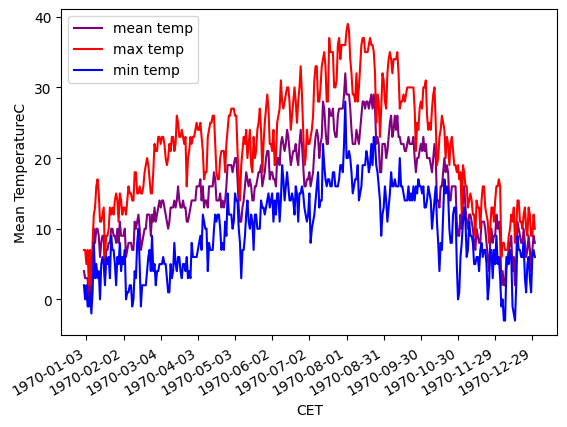

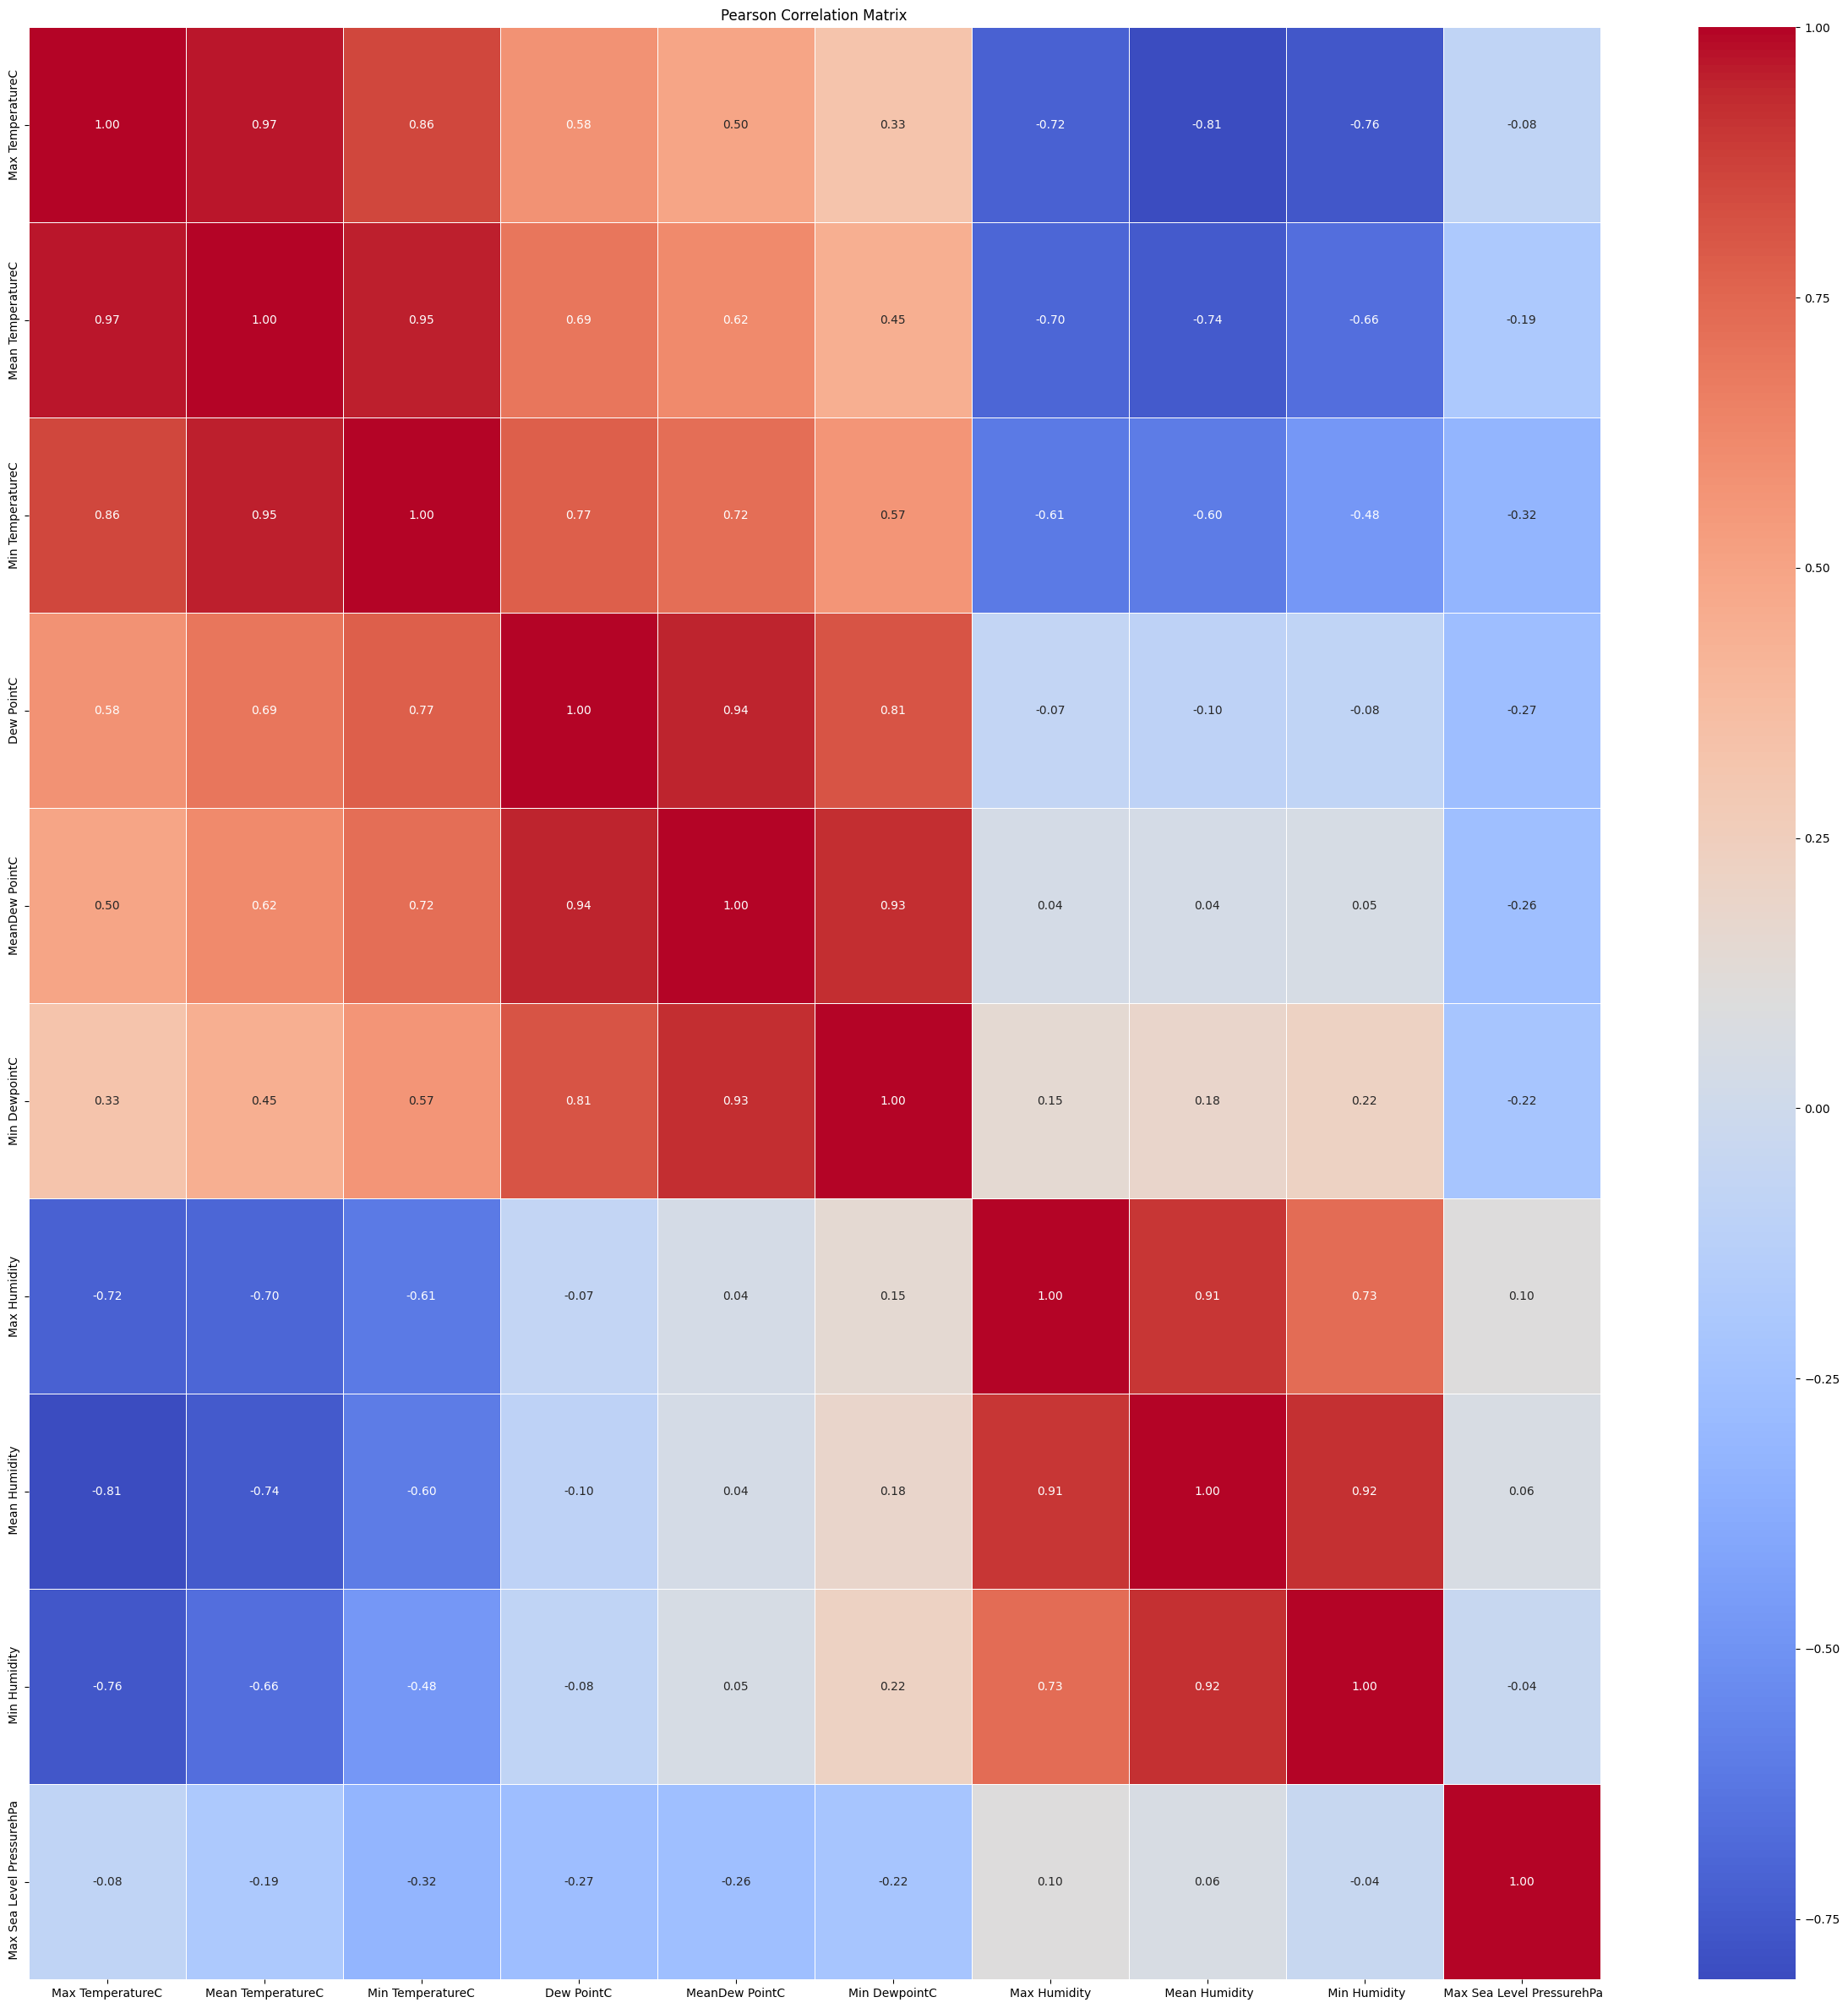

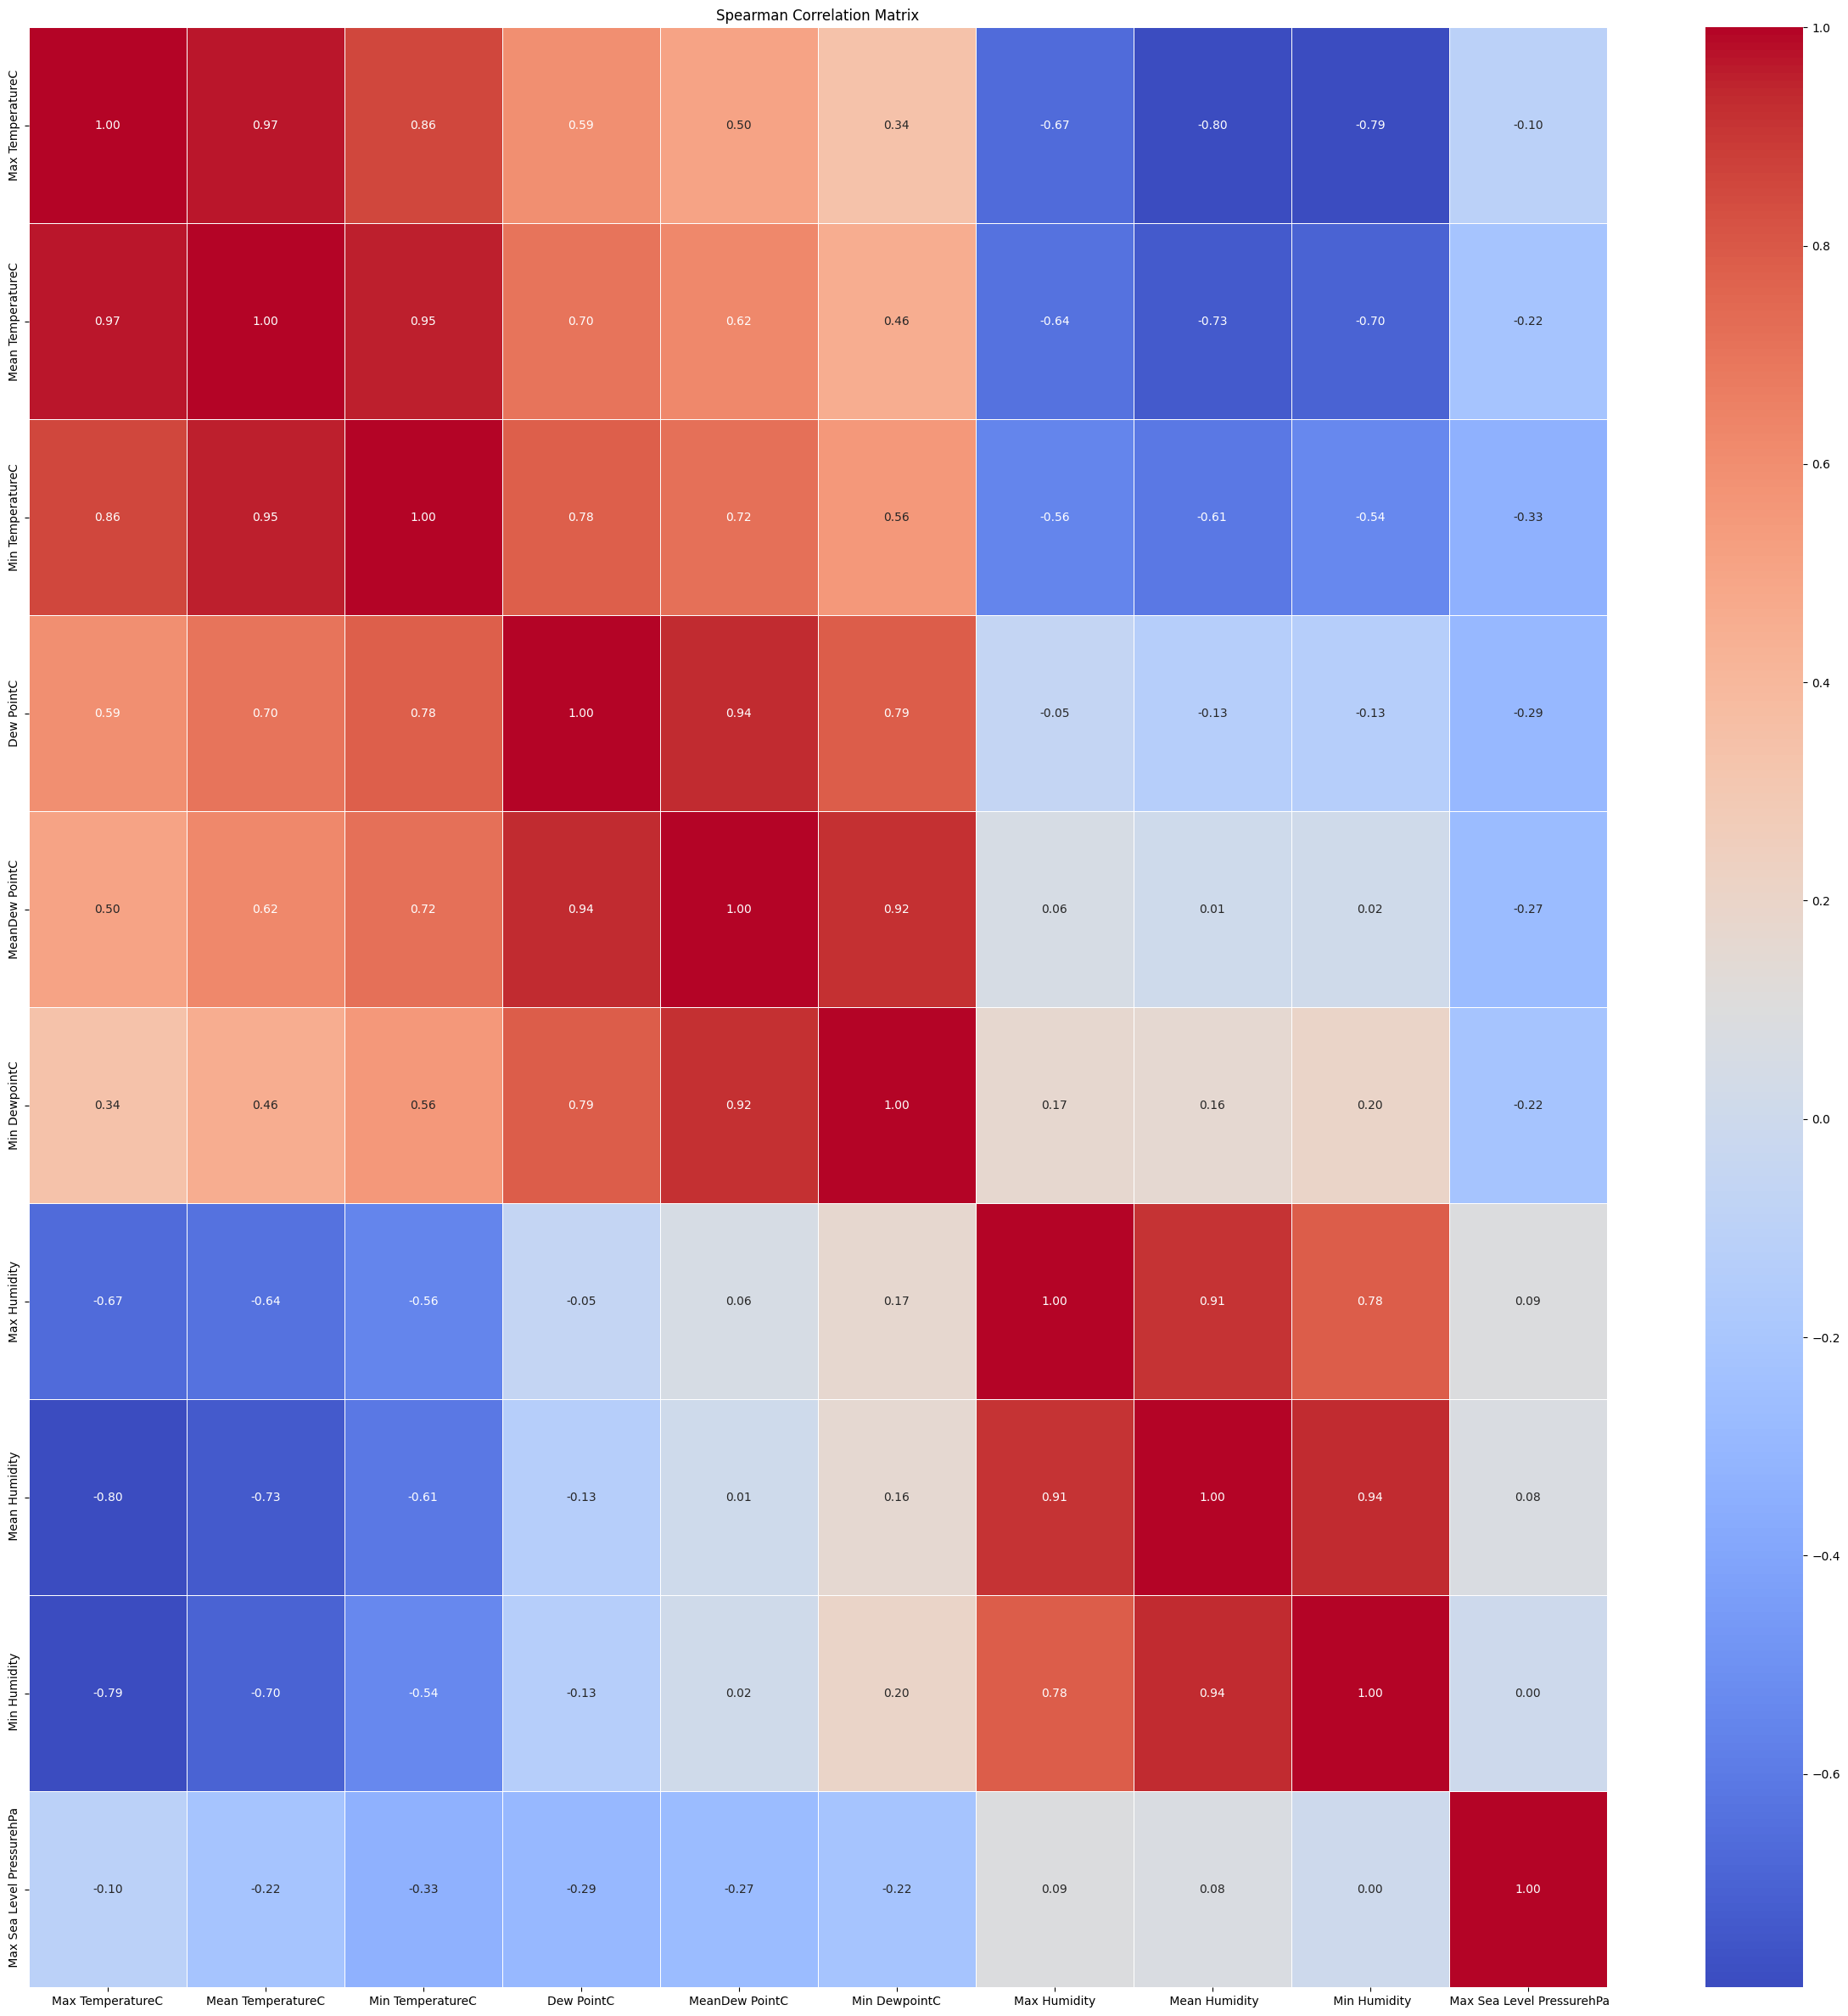

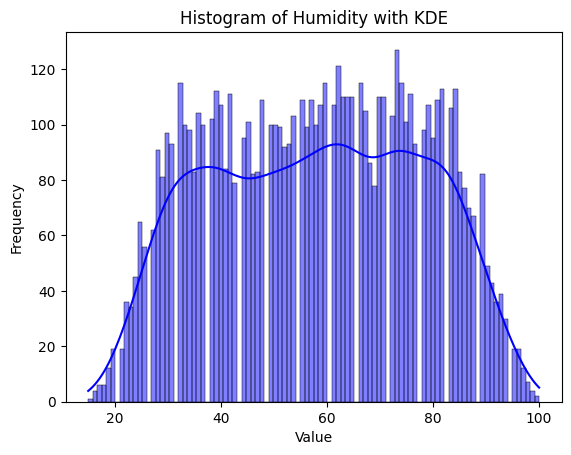

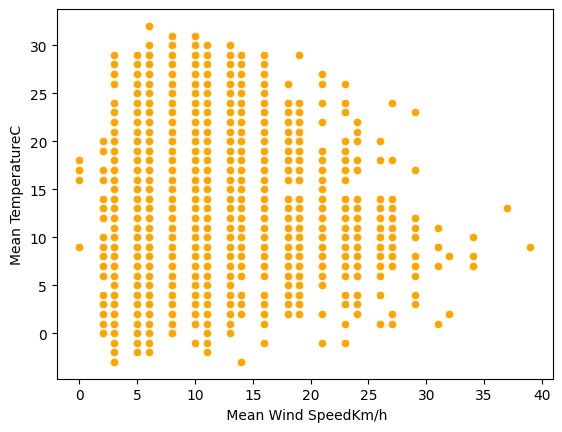

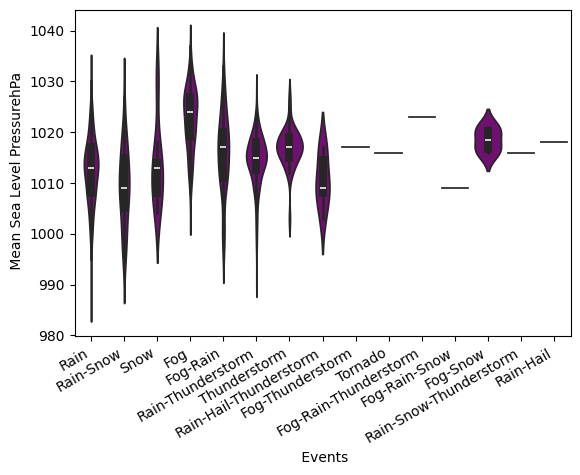

In [76]:
def visualize_data():
    """
    Parse the data from weather.csv file and visualize it using Matplotlib. Use more then one visualization. 
    Save the results in the repository.

    Args:
        None: None.

    Returns:
        None: None.
    """
    os.makedirs('./viz', exist_ok=True)
    data_path = './resources/weather.csv'
    full_df = pd.read_csv(data_path)
    print(full_df.info())
    print(full_df.describe())

    plt.figure()
    sns.lineplot(x=full_df['CET'][:365], y=full_df['Mean TemperatureC'][:365], color='purple', label='mean temp')
    sns.lineplot(x=full_df['CET'][:365], y=full_df['Max TemperatureC'][:365], color='red', label='max temp')
    sns.lineplot(x=full_df['CET'][:365], y=full_df['Min TemperatureC'][:365], color='blue', label='min temp')
    

    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    plt.gcf().autofmt_xdate()
    
    plt.savefig('./viz/lineplot.png')
    part_df = full_df.drop(columns=['CET', ' Events']).iloc[:, :10]
    pearson_corr = part_df.corr(method='pearson')
    spearman_corr = part_df.corr(method='spearman')

    plt.figure(figsize=(30, 30))
    sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
    plt.title('Pearson Correlation Matrix')
    plt.savefig('./viz/pearson_corr.png')

    plt.figure(figsize=(30, 30))
    sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
    plt.title('Spearman Correlation Matrix')
    plt.savefig('./viz/spearman_corr.png')

    plt.figure()
    sns.histplot(full_df[' Mean Humidity'], bins=100, kde=True, color='blue')
    plt.title('Histogram of Humidity with KDE')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.savefig('./viz/hist.png')

    plt.figure()
    sns.scatterplot(full_df, x=' Mean Wind SpeedKm/h', y='Mean TemperatureC', color='orange')
    plt.savefig('./viz/scatter.png')

    plt.figure()
    sns.violinplot(data=full_df, x=' Events', y=' Mean Sea Level PressurehPa', color='purple')
    plt.gcf().autofmt_xdate()
    plt.savefig('./viz/violin.png')

    return None

visualize_data()